This notebook only makes a figure out of pre-computed behavior predictions.
It relies on finding a summary file in the `results` folder.

To recompute ad reproduce these results from scratch, one would need to run the following scripts:
1. `./scripts/chewie/extract_data.py` to save the ground truth data
2. `./scripts/chewie/run_biRNN_decoder.py` to save the results of the biRNN decoder 
3. `./scripts/chewie/run_avg_per_epoch.py` to save the trial-average per-condition predictions
4. `./scripts/chewie/run_PSID.py` to save the results of the PSID decoder
5. `./scripts/chewie/run_CEBRA.py` to save the results of the CEBRA decoder
6. Run LFADS/BAND training, ablate controls, run `scripts/band_performance.py` afterwards to save each run to a summary table (see `./scripts/run_sequence.py` as an example of all actions and naming that automatically goes into summary)

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from plot_helpers import get_trials2plot, get_random_trials2plot

%load_ext nb_black

Matplotlib created a temporary cache directory at /tmp/matplotlib-x278w7le because the default path (/afs/inf.ed.ac.uk/user/n/nkudryas/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<IPython.core.display.Javascript object>

In [13]:
path = '../../results/Mihili_CO_FF_2014-02-17.h5'
data = {}
with h5py.File(path, 'r') as f:
   for key in f.keys():
      data[key] = f[key][()]
data.keys()

dict_keys(['test_M1_band_pred', 'test_M1_birnn_pred', 'test_M1_cebra_pred', 'test_M1_lfads_pred', 'test_M1_psid_pred', 'test_PMd_band_pred', 'test_PMd_birnn_pred', 'test_PMd_cebra_pred', 'test_PMd_lfads_pred', 'test_PMd_psid_pred', 'test_all_avg_per_epoch_pred', 'test_all_band_pred', 'test_all_birnn_pred', 'test_all_cebra_pred', 'test_all_lfads_pred', 'test_all_psid_pred', 'train_M1_band_pred', 'train_M1_birnn_pred', 'train_M1_cebra_pred', 'train_M1_lfads_pred', 'train_M1_psid_pred', 'train_PMd_band_pred', 'train_PMd_birnn_pred', 'train_PMd_cebra_pred', 'train_PMd_lfads_pred', 'train_PMd_psid_pred', 'train_all_avg_per_epoch_pred', 'train_all_band_pred', 'train_all_birnn_pred', 'train_all_cebra_pred', 'train_all_lfads_pred', 'train_all_psid_pred', 'train_behavior', 'train_epoch', 'train_inds', 'train_target_direction', 'valid_behavior', 'valid_epoch', 'valid_inds', 'valid_target_direction'])

<IPython.core.display.Javascript object>

In [14]:
dset='valid'
vel = data[f'{dset}_behavior'][:]
target_direction = data[f'{dset}_target_direction'][:]
epoch = data[f'{dset}_epoch'][:]
pos = np.cumsum(vel, axis=1)

<IPython.core.display.Javascript object>

In [15]:
dir_index = np.array([
        sorted(set(target_direction)).index(i) for i in target_direction
    ])

avg_vel_per_epoch = data['test_all_avg_per_epoch_pred']


<IPython.core.display.Javascript object>

In [16]:
np.random.seed(1)
# trials2plot = np.array([get_random_trials2plot(vel, avg_vel_per_epoch, dir_index, epoch, i) for i in range(3)]).sum(0)
trials2plot = np.array([get_random_trials2plot(dir_index, epoch, i) for i in range(3)]).sum(0)
trials2plot.sum()

24

<IPython.core.display.Javascript object>

In [17]:
trials2plot

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1])

<IPython.core.display.Javascript object>

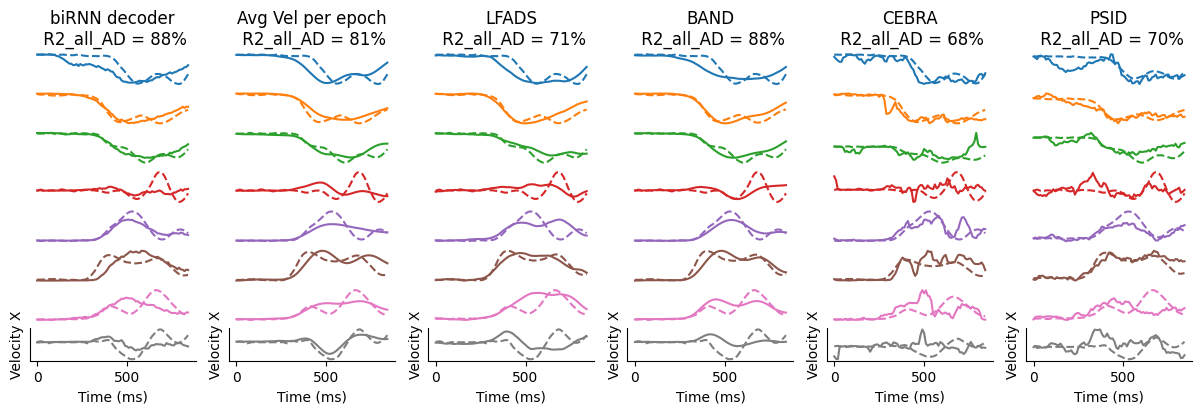

<IPython.core.display.Javascript object>

In [18]:
def plot_beh_pred(vel, pred_vel, dir_index, t2p, axes, area, epoch_name, component=0,title=""):
    '''
    Plot hand velocity and predicted hand velocity for each direction
    '''

    BIN_SIZE = 10 # ms
    time = np.arange(vel.shape[1]) * BIN_SIZE

    for v, ls in zip([vel, pred_vel], ["--", "solid"]):
        for t in range(0, vel.shape[0]):
            if t2p[t]:
                d = dir_index[t]
                axes[d].plot(
                    time,
                    v[t, :, component],
                    color=f"C{d}",
                    alpha=1,
                    ls=ls,
                )

    for ax in axes[:-1]:
        ax.axis("off")
    axes[-1].spines['top'].set_visible(False)
    axes[-1].spines['right'].set_visible(False)
    axes[-1].set_yticks([])
    axes[-1].set_xlabel("Time (ms)")
    axes[-1].set_ylabel("Velocity X")

    R2_iso_vel = 1 - np.sum((vel - pred_vel) ** 2) / np.sum((vel - vel.mean(0)) ** 2)
    axes[0].set_title(f'{title}\n R2_{area}_{epoch_name} = {R2_iso_vel*100:.0f}%')
    # R2_iso_vel = 1 - np.sum((vel[t2p == 1] - pred_vel[t2p == 1]) ** 2) / np.sum((vel[t2p == 1] - vel.mean(0)) ** 2)
    # axes[0].set_title(f'{title}\n R2_{area}_{epoch_name} = {R2_iso_vel*100:.2f}%')
        

fig, axes = plt.subplots(8,6,figsize=(6*2.5, 8*.5))

# epoch_mask, epoch_name = (epoch==0), 'BL'
epoch_mask, epoch_name = (epoch==1), 'AD'
# epoch_mask, epoch_name = (epoch==epoch), 'all'
component = 0

area = 'all'
for i, (key, title) in enumerate(zip([f'test_{area}_birnn_pred','test_all_avg_per_epoch_pred',
                                      f'test_{area}_lfads_pred',f'test_{area}_band_pred',
                                      f'test_{area}_cebra_pred',f'test_{area}_psid_pred'],
                                  ['biRNN decoder', 'Avg Vel per epoch',
                                   'LFADS', 'BAND',
                                   'CEBRA',"PSID"])):

    plot_beh_pred(vel[epoch_mask], 
                data[key][epoch_mask], 
                dir_index[epoch_mask], 
                trials2plot[epoch_mask], 
                axes[:,i], 
                area,
                epoch_name,
                component=1, 
                title=title)

fig.savefig("figs/Figure4")

Text(0.5, 1.0, 'Mihili_CO_FF_2014-02-17')

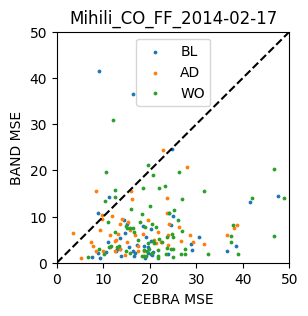

<IPython.core.display.Javascript object>

In [19]:
mse_cebra = np.mean((data[f'test_{area}_cebra_pred'] - vel) ** 2,-1).mean(-1)
mse_band = np.mean((data[f'test_{area}_band_pred'] - vel) ** 2,-1).mean(-1)
plt.figure(figsize=(3,3))
for e, en in enumerate(['BL','AD','WO']):
    mask = epoch==e
    plt.scatter(mse_cebra[mask], mse_band[mask],s=3,label=en)
plt.legend()
plt.xlim([0,50])
plt.ylim([0,50])
plt.plot([0,50],[0,50],'k--')
plt.xlabel('CEBRA MSE')
plt.ylabel('BAND MSE')
plt.title(path.split('/')[-1].split('.')[0])

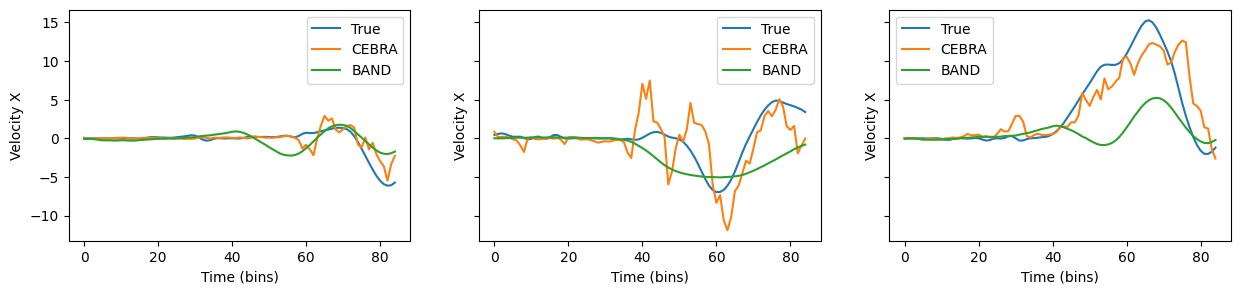

<IPython.core.display.Javascript object>

In [21]:
mask = (mse_band<20) & (mse_cebra<mse_band) & (epoch == 1)

fig, axes = plt.subplots(1,sum(mask),figsize=(sum(mask)*5, 3),sharey=True)
for i,m in enumerate(np.where(mask)[0]):
    axes[i].plot(vel[m,:,0].T,label='True')
    axes[i].plot(data[f'test_{area}_cebra_pred'][m,:,0].T,label='CEBRA')
    axes[i].plot(data[f'test_{area}_band_pred'][m,:,0].T,label='BAND')
    # axes[i].plot(data[f'test_{area}_birnn_pred'][m,:,0].T,label='biRNN')
    axes[i].legend()
    axes[i].set_xlabel('Time (bins)')
    axes[i].set_ylabel('Velocity X')

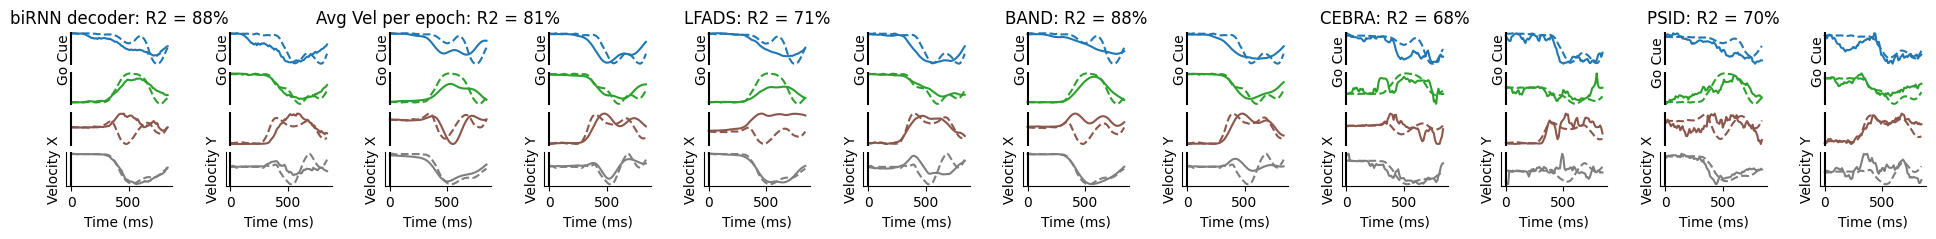

<IPython.core.display.Javascript object>

In [22]:
def plot_beh_pred(vel, pred_vel, dir_index, t2p, axes, area, epoch_name, select = None, component=0,title=""):
    '''
    Plot hand velocity and predicted hand velocity for each direction
    '''
    BIN_SIZE = 10 # ms
    time = np.arange(vel.shape[1]) * BIN_SIZE

    for v, ls in zip([vel, pred_vel], ["--", "solid"]):
        for t in range(0, vel.shape[0]):
            if t2p[t]:
                d = dir_index[t]
                if select is None:
                    d_id = d
                else:
                    if d in select:
                        d_id = np.where(select == d)[0][0]
                    else: 
                        d_id = None
                if d_id is not None:
                    axes[d_id].plot(
                        time,
                        v[t, :, component],
                        color=f"C{d}",
                        alpha=1,
                        ls=ls,
                    )
    for d in range(len(axes)):
        axes[d].axvline(0,c='k')

    for ax in axes[:-1]:
        ax.axis("off")
    axes[-1].spines['top'].set_visible(False)
    axes[-1].spines['right'].set_visible(False)
    axes[-1].set_yticks([])
    axes[-1].set_xlabel("Time (ms)")
    component_names = ['Velocity X', 'Velocity Y']
    axes[-1].set_ylabel(component_names[component])
    axes[0].text(0,0,'Go Cue',rotation=90,va='top',ha='right')

    R2_iso_vel = 1 - np.sum((vel - pred_vel) ** 2) / np.sum((vel - vel.mean(0)) ** 2)
    if component == 0:
        axes[0].set_title(f'{title}: R2 = {R2_iso_vel*100:.0f}%',loc='center')
    # R2_iso_vel = 1 - np.sum((vel[t2p == 1] - pred_vel[t2p == 1]) ** 2) / np.sum((vel[t2p == 1] - vel.mean(0)) ** 2)
    # axes[0].set_title(f'{title}\n R2_{area}_{epoch_name} = {R2_iso_vel*100:.2f}%')
        

fig, axes = plt.subplots(4,12,figsize=(12*2, 4*.5))

# epoch_mask, epoch_name = (epoch==0), 'BL'
epoch_mask, epoch_name = (epoch==1), 'AD'
# epoch_mask, epoch_name = (epoch==epoch), 'all'
component = 0

area = 'all'
for i, (key, title) in enumerate(zip([f'test_{area}_birnn_pred','test_all_avg_per_epoch_pred',
                                      f'test_{area}_lfads_pred',f'test_{area}_band_pred',
                                      f'test_{area}_cebra_pred',f'test_{area}_psid_pred'],
                                  ['biRNN decoder', 'Avg Vel per epoch',
                                   'LFADS', 'BAND',
                                   'CEBRA',"PSID"])):
    for j in [0,1]:
        plot_beh_pred(vel[epoch_mask], 
                    data[key][epoch_mask], 
                    dir_index[epoch_mask], 
                    trials2plot[epoch_mask], 
                    axes[:,2*i+j], 
                    area,
                    epoch_name,
                    select = np.array([0,2,5,7]),
                    component=j, 
                    title=title)
    

plt.subplots_adjust(wspace=0.5)
fig.savefig("figs/Figure4.svg")

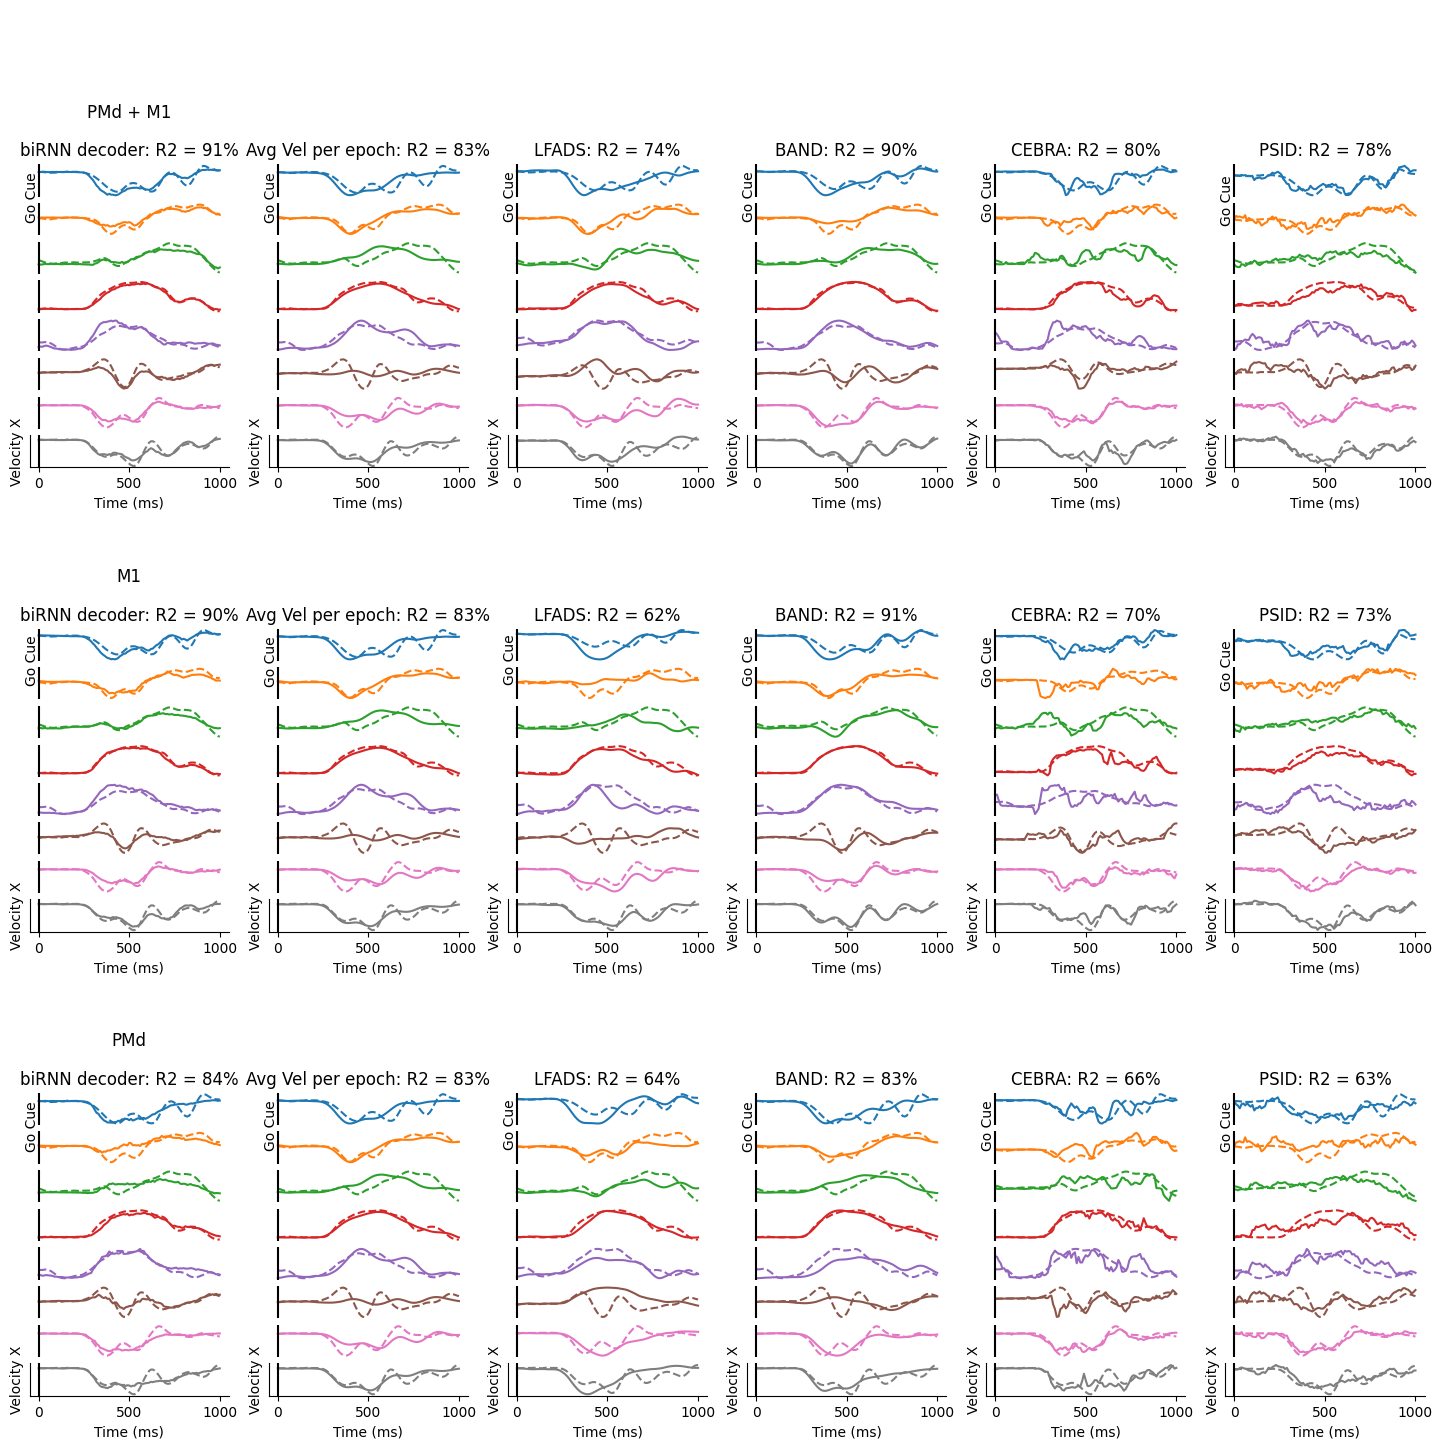

<IPython.core.display.Javascript object>

In [30]:
skip = 4
fig, axes = plt.subplots((8+skip)*3,6,figsize=(6*3, (8+skip)*.5*3))

# epoch_mask, epoch_name = (epoch==0), 'BL'
epoch_mask, epoch_name = (epoch==1), 'AD'
# epoch_mask, epoch_name = (epoch==epoch), 'all'
component = 0

# area = 'all'

import matplotlib.patches as patches
for j, area in enumerate(['all','M1','PMd']):
    model_keys = [f'test_{area}_birnn_pred','test_all_avg_per_epoch_pred',
                    f'test_{area}_lfads_pred',f'test_{area}_band_pred',
                    f'test_{area}_cebra_pred',f'test_{area}_psid_pred']
    for i, (key, title) in enumerate(zip(model_keys,
                                    ['biRNN decoder', 'Avg Vel per epoch',
                                    'LFADS', 'BAND',
                                    'CEBRA',"PSID"])):

        plot_beh_pred(vel[epoch_mask], 
                    data[key][epoch_mask], 
                    dir_index[epoch_mask], 
                    trials2plot[epoch_mask], 
                    axes[j*(8+skip)+skip:(j+1)*(8+skip),i], 
                    area,
                    epoch_name,
                    component=0, 
                    title=title)
        for k in range(skip):
            axes[j*(8+skip)+k,i].axis("off")
    if area=='all':
        area_title = 'PMd + M1'
    else:
        area_title = area
    axes[j*(8+skip)+skip-1,0].set_title(area_title)

fig.savefig("figs/Figure4_supplement.pdf")

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0]
[0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0]
[1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0]
[0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0]
[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0]


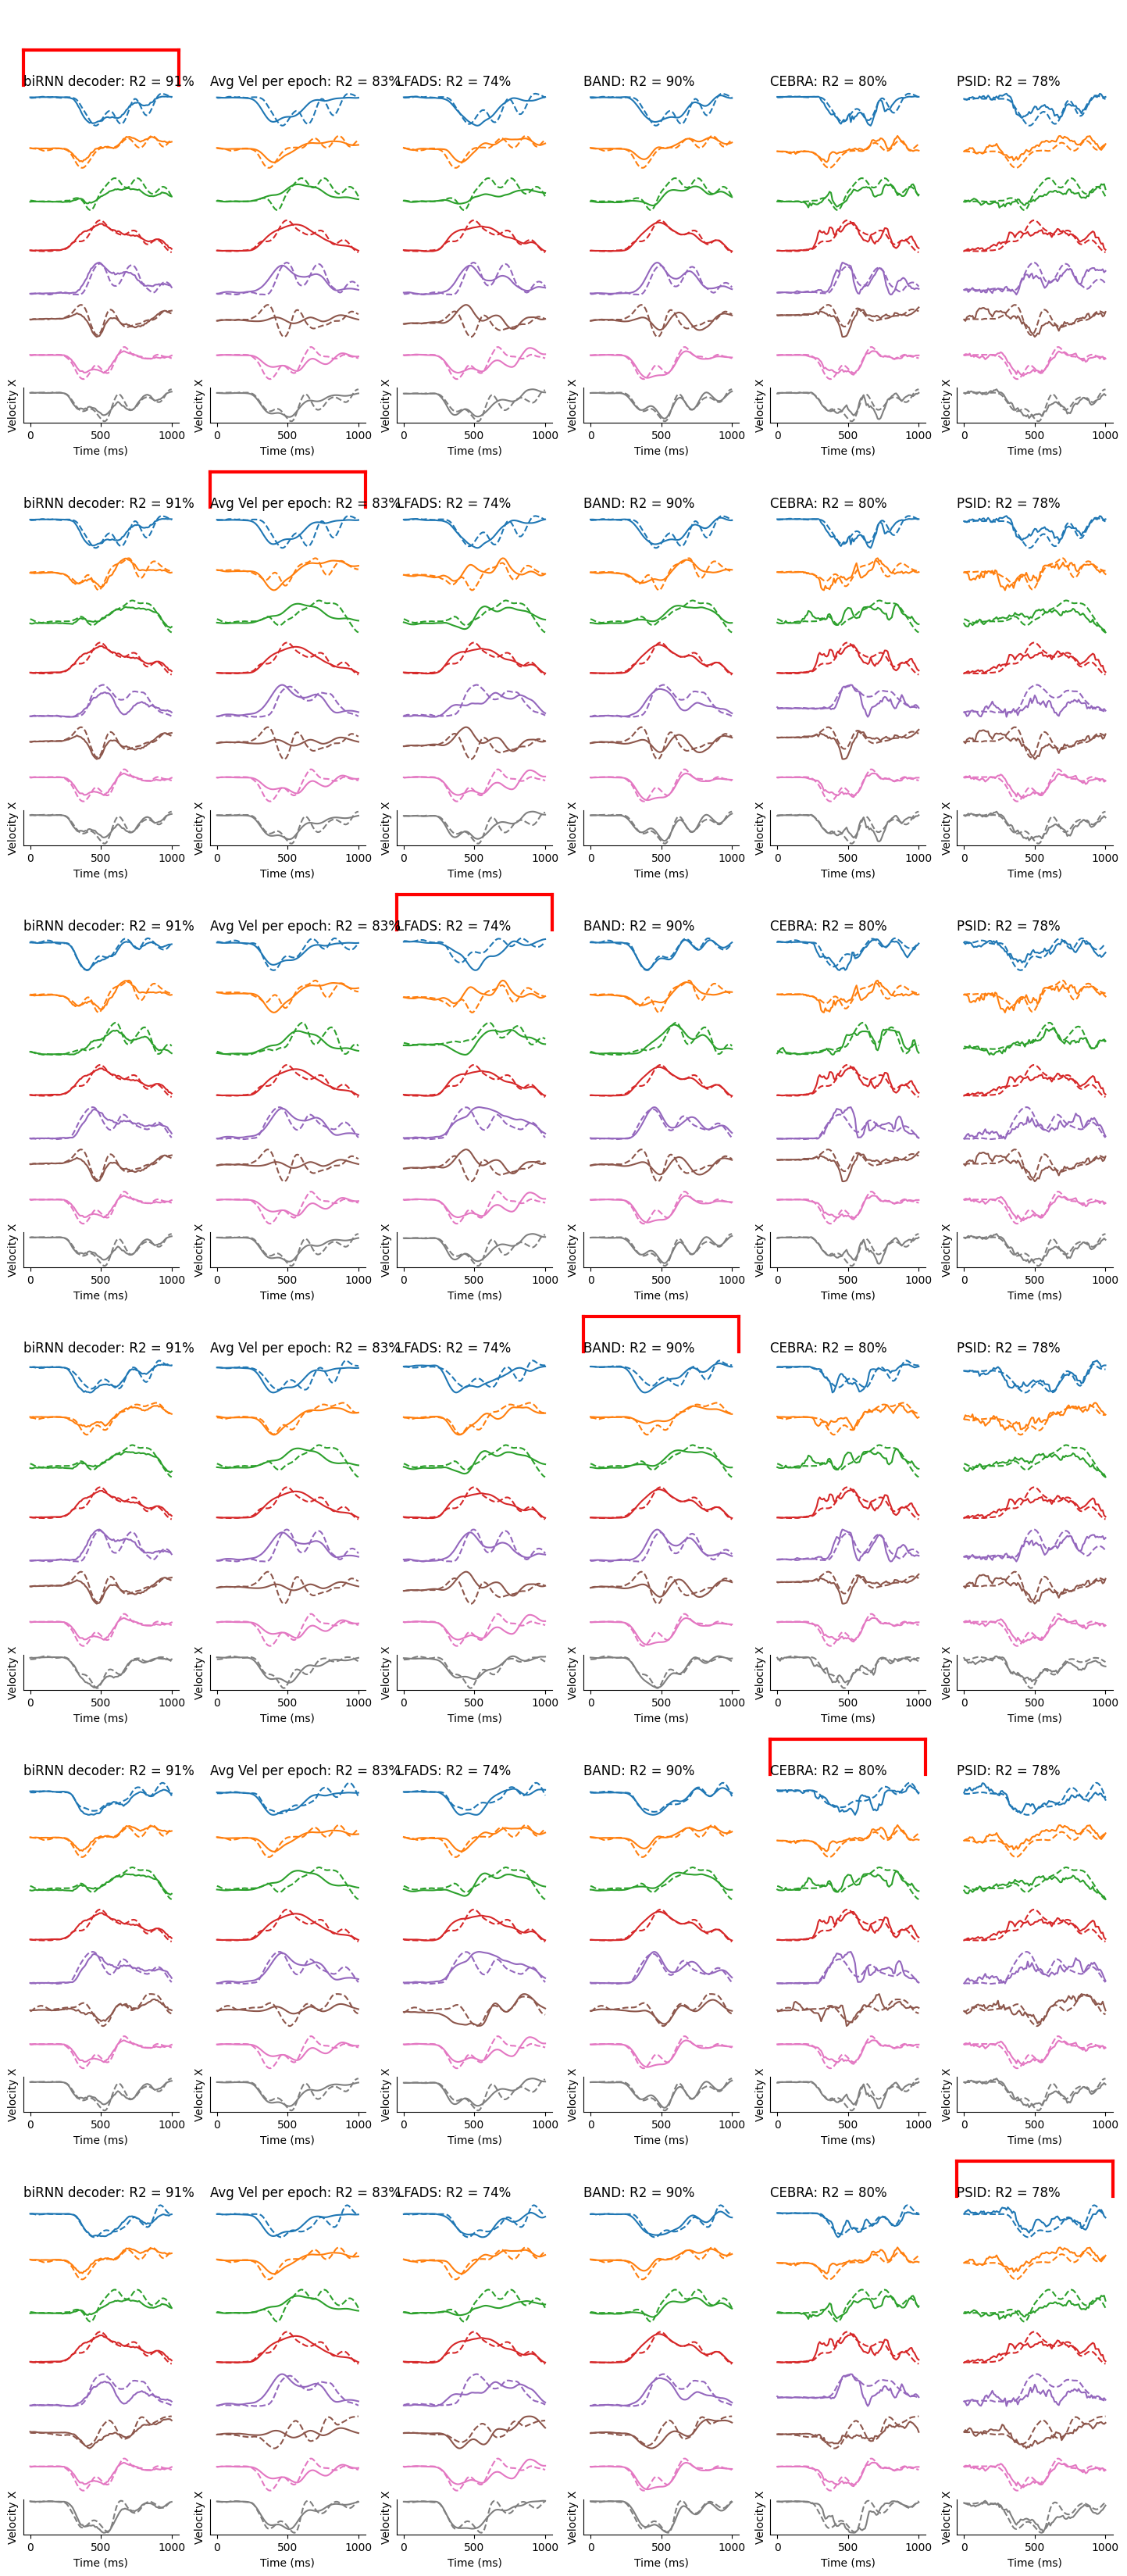

<IPython.core.display.Javascript object>

In [30]:
fig, axes = plt.subplots((8+2)*6,6,figsize=(6*3, (8+2)*.7*6))

# epoch_mask, epoch_name = (epoch==0), 'BL'
epoch_mask, epoch_name = (epoch==1), 'AD'
# epoch_mask, epoch_name = (epoch==epoch), 'all'
component = 0

area = 'all'
model_keys = [f'test_{area}_birnn_pred','test_all_avg_per_epoch_pred',
                f'test_{area}_lfads_pred',f'test_{area}_band_pred',
                f'test_{area}_cebra_pred',f'test_{area}_psid_pred']

import matplotlib.patches as patches
for j,model_key in enumerate(model_keys):
    trials2plot = np.array([get_trials2plot(vel, data[model_key], dir_index, epoch, i) for i in range(3)]).sum(0)
    print(trials2plot[epoch_mask])
    for i, (key, title) in enumerate(zip(model_keys,
                                    ['biRNN decoder', 'Avg Vel per epoch',
                                    'LFADS', 'BAND',
                                    'CEBRA',"PSID"])):

        plot_beh_pred(vel[epoch_mask], 
                    data[key][epoch_mask], 
                    dir_index[epoch_mask], 
                    trials2plot[epoch_mask], 
                    axes[j*10+2:(j+1)*10,i], 
                    area,
                    epoch_name,
                    component=0, 
                    title=title)
        axes[j*10,i].axis("off")
        axes[j*10+1,i].axis("off")
    axes[j*10+1,j].axis("on")
    for edge in ['top','left','right']:
        axes[j*10+1,j].spines[edge].set_color('red')
        axes[j*10+1,j].spines[edge].set_linewidth(3)
    axes[j*10+1,j].set_xticks([])
    axes[j*10+1,j].set_yticks([])
    axes[j*10+1,j].spines['bottom'].set_linewidth(0)



In [31]:
# loop through epochs (x3)
# loop through areas (keeping all for Avg) (x3)
# loop through components (x2)

# 18 figures in total. Paper: AD and all 3 areas, X coordinate

<IPython.core.display.Javascript object>